In [1]:
pip install cluster

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Clustering.csv')

In [4]:
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [5]:
df.shape

(303, 2)

In [6]:
df.describe()

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


In [7]:
from sklearn.cluster import KMeans

In [8]:
km = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [9]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [10]:
centroids = km.cluster_centers_
print(centroids)

[[194.68085106 125.70212766]
 [246.35       159.12      ]
 [384.85714286 152.        ]
 [306.70909091 153.50909091]
 [198.95081967 167.91803279]
 [267.6969697  114.33333333]]


In [11]:
wcss = km.inertia_
print(wcss)

158631.04625839338


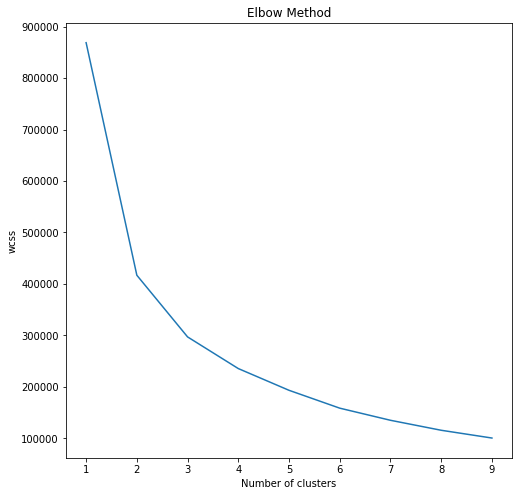

In [12]:
#Elbow method- KNN clusters

distortion = []

k = range(1,10)

for i in k:
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df)
    distortion.append(km.inertia_)
    
plt.figure(figsize=(8,8))

plt.plot(k,distortion)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [14]:
import scipy.cluster.hierarchy as sch

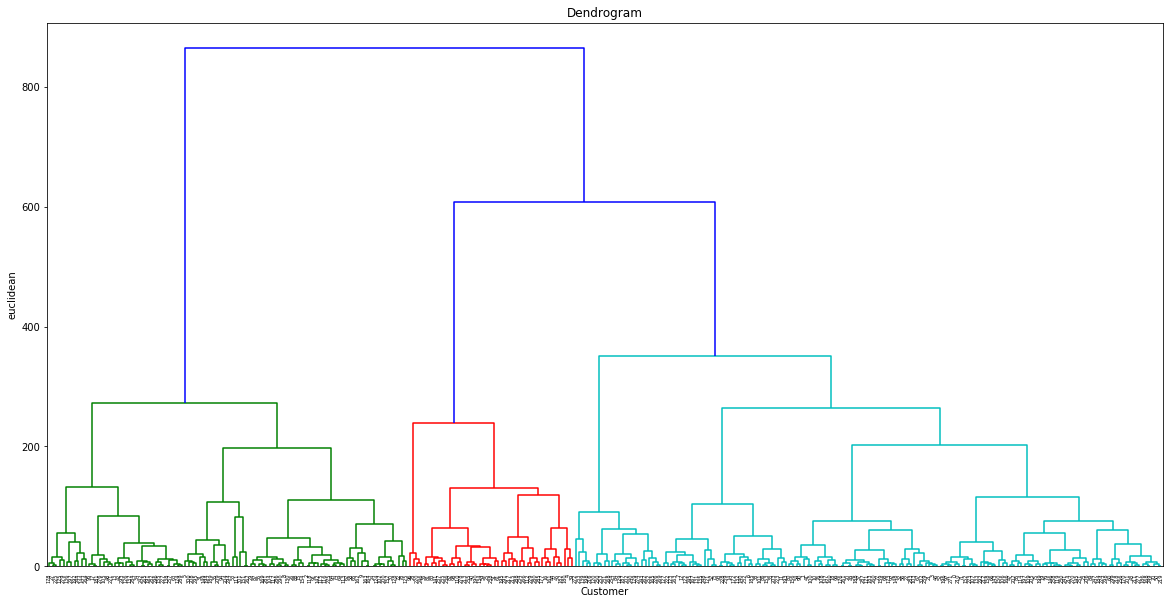

In [15]:
#Plotting Dendrogram - HEIRARCHICAL clustering

fig,ax_1 = plt.subplots(figsize=(20,10))

dend = sch.dendrogram(sch.linkage(df, method='ward'),leaf_rotation=90, ax=ax_1)

ax_1.set_title("Dendrogram")
ax_1.set_xlabel('Customer')
ax_1.set_ylabel('euclidean')
plt.show()

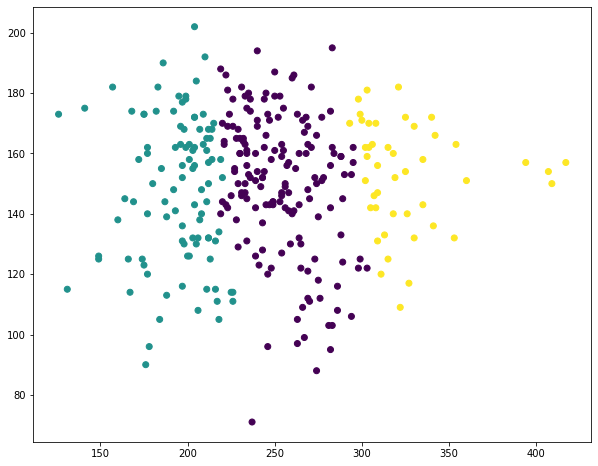

In [19]:
#Agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

plt.figure(figsize=(10,8))

plt.scatter(df.iloc[:,0],df.iloc[:,1],c=cluster.labels_,cmap = 'viridis')
plt.show()